In [6]:
from sympy import symbols, Implies
from sympy.logic.boolalg import to_cnf
from sympy.logic import satisfiable


In [8]:
#1.	First-Order Logic (FOL) Representation using Python



# Define symbols
John, Mary, B1 = symbols('John Mary B1')
Gives = symbols('Gives')
Owns = symbols('Owns')

# Logical statements
# If John gives B1 to Mary, then Mary owns B1
rule = Implies(Gives, Owns)

# Fact: John gives B1 to Mary
fact = Gives

# Convert to CNF (Conjunctive Normal Form) for reasoning
cnf_rule = to_cnf(rule)
cnf_fact = to_cnf(fact)

# Check if Owns(Mary, B1) is entailed
result = satisfiable(cnf_rule & cnf_fact)

# Output inference result
print("Does Mary own the book after John gives it to her?", result[Owns] if Owns in result else "No")


Does Mary own the book after John gives it to her? True


In [39]:
#Conceptual Graphs (CGs) Representation using Python (NetworkX)

import networkx as nx
import matplotlib.pyplot as plt


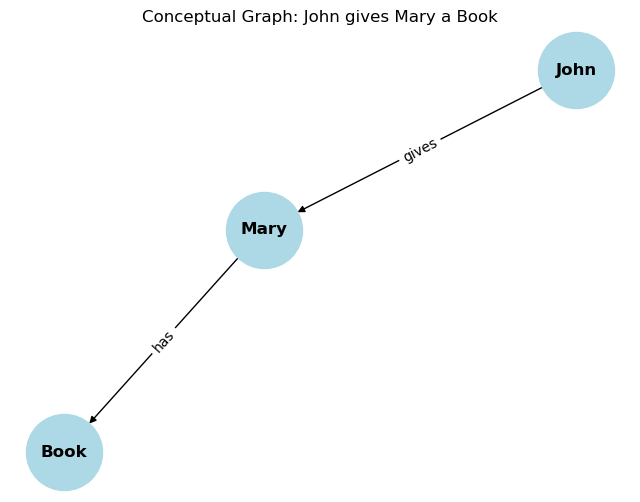

Graph Structure:
[('John', 'Mary', {'relation': 'gives'}), ('Mary', 'Book', {'relation': 'has'})]


In [40]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes for the concepts (John, Mary, and Book)
G.add_node("John", type="Person")
G.add_node("Mary", type="Person")
G.add_node("Book", type="Object")

# Add edges for the relationships
# John gives a book to Mary
G.add_edge("John", "Mary", relation="gives")
G.add_edge("Mary", "Book", relation="has")

# Visualizing the graph
pos = nx.spring_layout(G)  # Layout for positioning nodes in the plot

# Create a new figure and axes explicitly to avoid errors
fig, ax = plt.subplots(figsize=(8, 6))

# Draw the graph with labels
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=12, font_weight="bold", ax=ax)
edge_labels = nx.get_edge_attributes(G, 'relation')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, ax=ax)

# Display the plot
plt.title("Conceptual Graph: John gives Mary a Book")
plt.show()

# Display the graph structure in a textual format
print("Graph Structure:")
print(G.edges(data=True))


In [29]:
class Person:
    def __init__(self, name, role):
        self.name = name  # Name of the person (e.g., John, Mary)
        self.role = role  # Role of the person (e.g., Giver, Receiver)

    def __repr__(self):
        return f"Person(name={self.name}, role={self.role})"


class GiveEvent:
    def __init__(self, giver, receiver, object_given):
        """
        The GiveEvent class represents the event where a giver gives an object to a receiver.
        :param giver: Person giving the object
        :param receiver: Person receiving the object
        :param object_given: The object being given
        """
        self.giver = giver  # The person who gives the object
        self.receiver = receiver  # The person who receives the object
        self.object_given = object_given  # The object being given (e.g., book)

    def __repr__(self):
        return f"GiveEvent(giver={self.giver.name}, receiver={self.receiver.name}, object_given={self.object_given})"

    def describe_event(self):
        return f"{self.giver.name} gives {self.object_given} to {self.receiver.name}."


# Creating instances of Person
john = Person("John", "Giver")
mary = Person("Mary", "Receiver")

# Creating a GiveEvent instance where John gives a book to Mary
book = "Book"
give_event = GiveEvent(john, mary, book)

# Describing the event
print(give_event.describe_event())

# Display the objects and their types
print(f"Giver: {john}")
print(f"Receiver: {mary}")
print(f"Event: {give_event}")


John gives Book to Mary.
Giver: Person(name=John, role=Giver)
Receiver: Person(name=Mary, role=Receiver)
Event: GiveEvent(giver=John, receiver=Mary, object_given=Book)
